In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport

In [2]:
# zomato_filepath = "Machine-Learning-SciKit/files/project_files/zomato.csv"
data = pd.read_csv("/home/dhruv/Downloads/zomato.csv", index_col='name')

In [3]:
data.head()

,url,address,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
name,,,,,,,,,,,,,,,,
Jalsa,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
Spice Elephant,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
San Churro Cafe,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
Addhuri Udupi Bhojana,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
Grand Village,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51717 entries, Jalsa to The Nest - The Den Bengaluru
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   phone                        50509 non-null  object
 7   location                     51696 non-null  object
 8   rest_type                    51490 non-null  object
 9   dish_liked                   23639 non-null  object
 10  cuisines                     51672 non-null  object
 11  approx_cost(for two people)  51371 non-null  object
 12  reviews_list                 51717 non-null  object
 13  menu_item

## Find the number of missing values in columns with missing values

In [5]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

rate                            7775
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
dtype: int64


## Check no of unique values per column

In [6]:
data.nunique(axis=0)

url                            51717
address                        11495
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
dish_liked                      5271
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
menu_item                       9098
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [7]:
data["location"].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [8]:
data["listed_in(city)"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

## Since "listed_in(city)" column had fewer unique values, I decided to retain that column but drop the "location" column as they both convey almost the same information

In [9]:
data.drop(["url"], inplace=True, axis=1)
data.drop(["address"], inplace=True, axis=1)
data.drop(["menu_item"], inplace=True, axis=1)
data.drop(["reviews_list"], inplace=True, axis=1)
data.drop(["phone"], inplace=True, axis=1)
data.drop(["dish_liked"], inplace=True, axis=1)
data.drop(["location"], inplace=True, axis=1)

In [10]:
data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
name,,,,,,,,,
Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
data.shape

(51717, 9)

In [12]:
obj_cols = [col for col in data.columns if data[col].dtypes=='object']
obj_cols

['online_order',
 'book_table',
 'rate',
 'rest_type',
 'cuisines',
 'approx_cost(for two people)',
 'listed_in(type)',
 'listed_in(city)']

Renaming the columns

In [13]:
data = data.rename(columns={'approx_cost(for two people)': 'approx_cost', 'listed_in(city)': "location" })
data.approx_cost = data.approx_cost.astype(str).apply(lambda x: x.replace(",", ""))
data.approx_cost = data.approx_cost.astype(float)

Since the "rate" column is a srting and in form "4.5/5", the following code first removes the "/5" part from every string.
The "rate" column also contains values "NEW" and "-" that cant be converted to a number, so I convert those values to NaN.

In [14]:
data.rate = data.rate.astype(str).apply(lambda x: x.replace("/5", ""))
data.rate = data.rate.replace("-", np.nan)
data.rate = data.rate.replace("NEW", np.nan)
data.rate = data.rate.apply(lambda x: float(x))

In [15]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

rate           10052
rest_type        227
cuisines          45
approx_cost      346
dtype: int64


In [16]:
print("No of Restaurants without rating: {}" .format(data.rate.isnull().sum()))
print("Average rating of restaurants: {}" .format(data.rate.mean()))
print("Dropping all restaurants without rating.")

No of Restaurants without rating: 10052
Average rating of restaurants: 3.700448817952717
Dropping all restaurants without rating.


In [17]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41168 entries, Jalsa to The Nest - The Den Bengaluru
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     41168 non-null  object 
 1   book_table       41168 non-null  object 
 2   rate             41168 non-null  float64
 3   votes            41168 non-null  int64  
 4   rest_type        41168 non-null  object 
 5   cuisines         41168 non-null  object 
 6   approx_cost      41168 non-null  float64
 7   listed_in(type)  41168 non-null  object 
 8   location         41168 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.1+ MB


In [19]:
data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost,listed_in(type),location
name,,,,,,,,,
Jalsa,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
Spice Elephant,Yes,No,4.1,787,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
Grand Village,No,No,3.8,166,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [20]:
data.location

name
Jalsa                                                     Banashankari
Spice Elephant                                            Banashankari
San Churro Cafe                                           Banashankari
Addhuri Udupi Bhojana                                     Banashankari
Grand Village                                             Banashankari
                                                              ...     
The Farm House Bar n Grill                                  Whitefield
Bhagini                                                     Whitefield
Best Brews - Four Points by Sheraton Bengaluru...           Whitefield
Chime - Sheraton Grand Bengaluru Whitefield Hotel &...      Whitefield
The Nest - The Den Bengaluru                                Whitefield
Name: location, Length: 41168, dtype: object

In [21]:
data.rest_type.nunique()

87

In [22]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
       'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
       'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
       'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
       'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
       'Dessert Parlor, Quick Bites', 'Food Court, 

In [23]:
data["rest_type"] = data["rest_type"].astype(str).apply(lambda x: x.split(",")[0])

I took each value from "rest_type" and split it at the ",". This returned a list of all the restaurant types.<br> From the list for each row, I selected the first value to be the rest_type.
<br>
This reduced the no of unique rest_types by almost 4!

In [24]:
data.rest_type.nunique()

22

In [25]:
data.rest_type.unique()

array(['Casual Dining', 'Cafe', 'Quick Bites', 'Delivery', 'Mess',
       'Dessert Parlor', 'Bakery', 'Pub', 'Takeaway', 'Fine Dining',
       'Beverage Shop', 'Sweet Shop', 'Bar', 'Kiosk', 'Food Truck',
       'Microbrewery', 'Lounge', 'Food Court', 'Dhaba', 'Club',
       'Confectionery', 'Bhojanalya'], dtype=object)

In [26]:
data.cuisines.value_counts(ascending=False)

North Indian                                            2107
North Indian, Chinese                                   1944
South Indian                                            1218
Cafe                                                     620
Bakery, Desserts                                         613
                                                        ... 
Turkish, Fast Food, Biryani, Chinese                       1
Finger Food, Continental, Pizza, Asian, North Indian       1
American, Finger Food, Italian, Mexican                    1
Singaporean, Chinese, Thai, Malaysian                      1
Chinese, Vietnamese, Thai, Malaysian                       1
Name: cuisines, Length: 2367, dtype: int64

In [27]:
cuisines_bk = data.cuisines.copy()

In [28]:
data.cuisines = cuisines_bk.copy()
data.cuisines.value_counts(ascending=False)

North Indian                                            2107
North Indian, Chinese                                   1944
South Indian                                            1218
Cafe                                                     620
Bakery, Desserts                                         613
                                                        ... 
Turkish, Fast Food, Biryani, Chinese                       1
Finger Food, Continental, Pizza, Asian, North Indian       1
American, Finger Food, Italian, Mexican                    1
Singaporean, Chinese, Thai, Malaysian                      1
Chinese, Vietnamese, Thai, Malaysian                       1
Name: cuisines, Length: 2367, dtype: int64

In [29]:
data["cuisines"] = data["cuisines"].astype(str).apply(lambda x: "Multi-Cuisine" if len(x.split(",")) > 4 else x)
data["cuisines"] = data["cuisines"].astype(str).apply(lambda x: x.split(",")[0] + "," + x.split(",")[1] if (len(x.split(",")) > 2) & (len(x.split(",")) <= 4) else x)

In [30]:
data.cuisines.value_counts(ascending=False)

North Indian, Chinese         3607
Multi-Cuisine                 3017
North Indian                  2107
South Indian                  1218
South Indian, North Indian    1207
                              ... 
Biryani, Bengali                 1
Seafood, Continental             1
Beverages, South Indian          1
Turkish, Fast Food               1
Desserts, Continental            1
Name: cuisines, Length: 665, dtype: int64

In [31]:
cuisines_types = data.cuisines.value_counts(ascending=False)
cuisines_few = cuisines_types[cuisines_types < 350]

In [32]:
cuisines_few

North Indian, Continental    346
Cafe, Italian                329
Desserts, Beverages          321
Andhra, Biryani              316
Desserts, Ice Cream          313
                            ... 
Biryani, Bengali               1
Seafood, Continental           1
Beverages, South Indian        1
Turkish, Fast Food             1
Desserts, Continental          1
Name: cuisines, Length: 643, dtype: int64

In [33]:
def handle_cuisines(value):
    if(value in cuisines_few):
        return "Others"
    else:
        return value

data.cuisines = data.cuisines.apply(handle_cuisines)

In [34]:
data.cuisines.value_counts(ascending=False)

Others                        20840
North Indian, Chinese          3607
Multi-Cuisine                  3017
North Indian                   2107
South Indian                   1218
South Indian, North Indian     1207
North Indian, South Indian      821
Cafe, Continental               768
Bakery, Desserts                725
Chinese, North Indian           660
North Indian, Mughlai           621
Cafe                            620
Biryani                         599
Biryani, North Indian           565
Desserts                        545
Fast Food                       511
Ice Cream, Desserts             452
North Indian, Biryani           420
Chinese                         409
Bakery                          377
Chinese, Thai                   373
Cafe, Fast Food                 354
Mithai, Street Food             352
Name: cuisines, dtype: int64

In [35]:
data.profile_report()

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]


# Visualization

<AxesSubplot:title={'center':'Number of restaurants in every Location'}, xlabel='count', ylabel='location'>

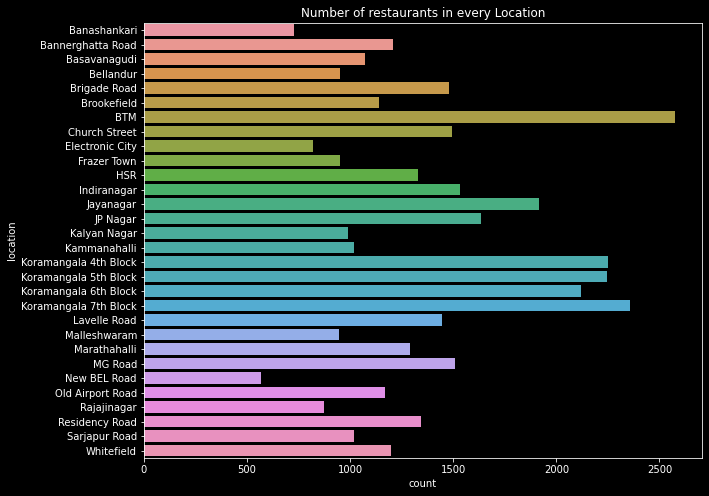

In [36]:
plt.style.use('dark_background')
plt.figure(figsize=(10,8))
plt.title("Number of restaurants in every Location")
sns.countplot(y=data.location)


<AxesSubplot:title={'center':'Restaurants having online-order service'}, xlabel='online_order', ylabel='count'>

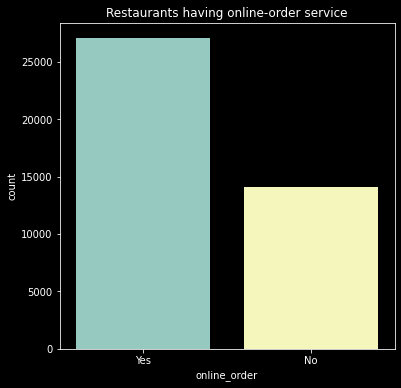

In [37]:
plt.figure(figsize=(6,6))
plt.title("Restaurants having online-order service")
sns.countplot(x=data.online_order)

<AxesSubplot:title={'center':'Rating compared to online-order service'}, xlabel='online_order', ylabel='rate'>

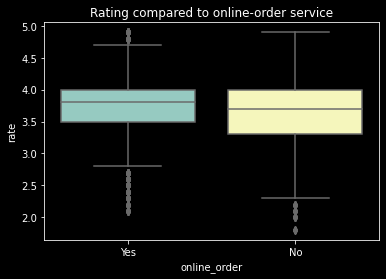

In [38]:
plt.title("Rating compared to online-order service")
sns.boxplot(x=data.online_order, y=data.rate)

<AxesSubplot:title={'center':'Restaurants having booking table service'}, xlabel='book_table', ylabel='count'>

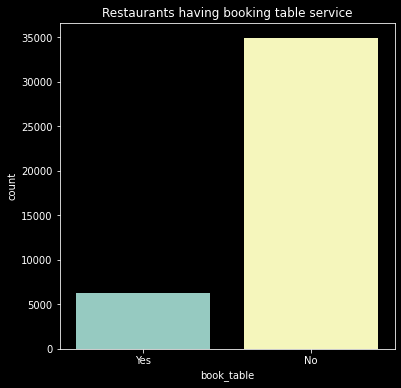

In [39]:
plt.figure(figsize=(6,6))
plt.title("Restaurants having booking table service")
sns.countplot(x=data.book_table)

<AxesSubplot:title={'center':'Rating compared to booking table service'}, xlabel='book_table', ylabel='rate'>

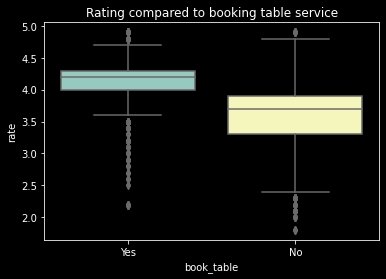

In [40]:
plt.title("Rating compared to booking table service")
sns.boxplot(x=data.book_table, y=data.rate)

<AxesSubplot:xlabel='rate', ylabel='location'>

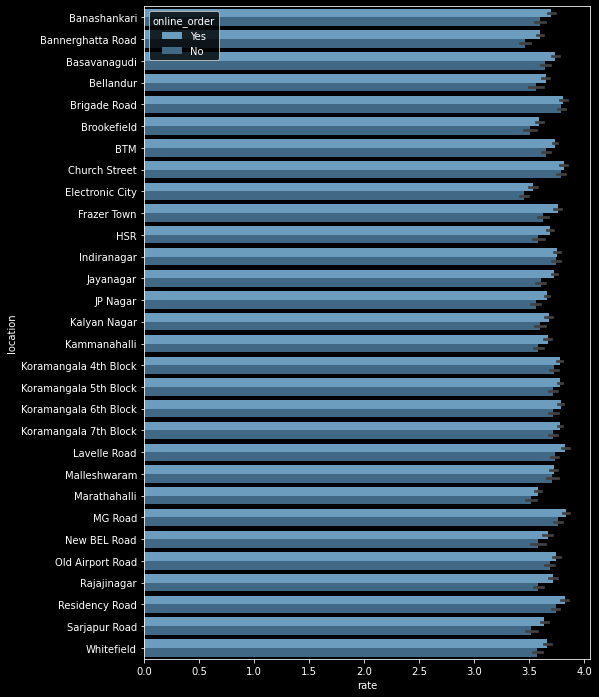

In [41]:
plt.figure(figsize=(8,12))
sns.barplot(y="location", x="rate", hue="online_order", data=data, palette="Blues_d")

<AxesSubplot:title={'center':'Average rating for every location'}, xlabel='rate', ylabel='location'>

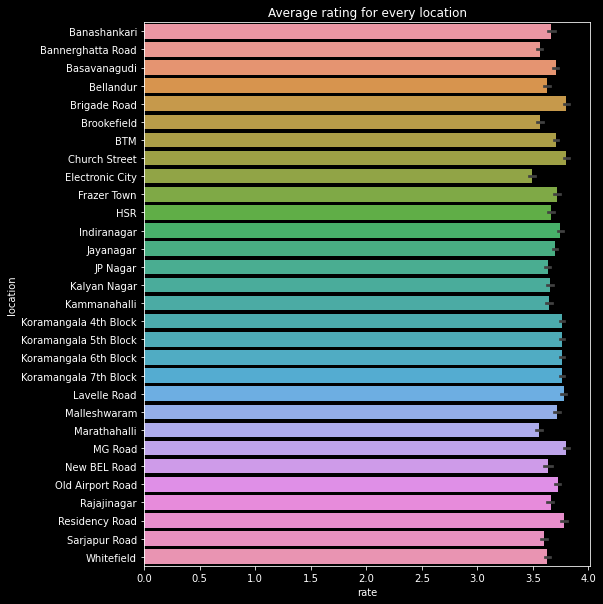

In [42]:
plt.figure(figsize=(8,10))
plt.title("Average rating for every location")
sns.barplot(y="location", x="rate", data=data)

<AxesSubplot:title={'center':'Average rating for every cuisine'}, xlabel='rate', ylabel='cuisines'>

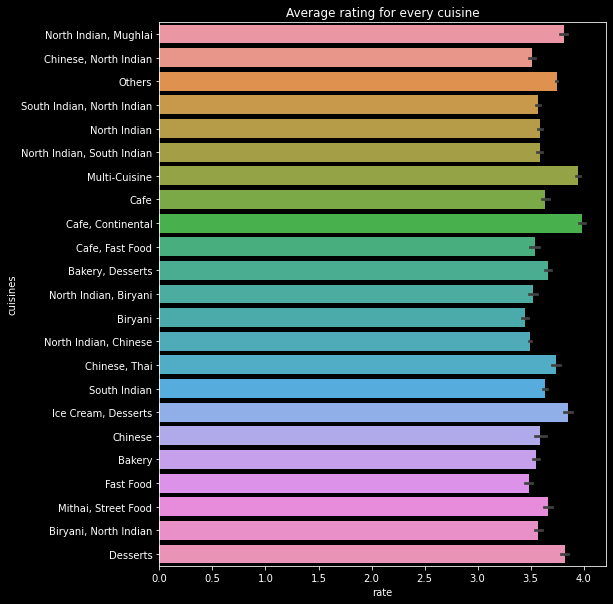

In [43]:
plt.figure(figsize=(8,10))
plt.title("Average rating for every cuisine")
sns.barplot(y="cuisines", x="rate", data=data)

# Predictions

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, r2_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [45]:
data_pred = data.copy()

In [46]:
encoder = LabelEncoder()
for col in ["online_order", "book_table", "rest_type", "cuisines", "listed_in(type)", "location"]:
    data_pred[col] = encoder.fit_transform(data_pred[col])

In [47]:
data_pred.head()

,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost,listed_in(type),location
name,,,,,,,,,
Jalsa,1,1,4.1,775,5,18,800.0,0,1
Spice Elephant,1,0,4.1,787,5,8,800.0,0,1
San Churro Cafe,1,0,3.8,918,4,20,800.0,0,1
Addhuri Udupi Bhojana,0,0,3.7,88,19,22,300.0,0,1
Grand Village,0,0,3.8,166,5,20,600.0,0,1


Index(['online_order', 'book_table', 'rate', 'votes', 'rest_type', 'cuisines',
       'approx_cost', 'listed_in(type)', 'location'],
      dtype='object')

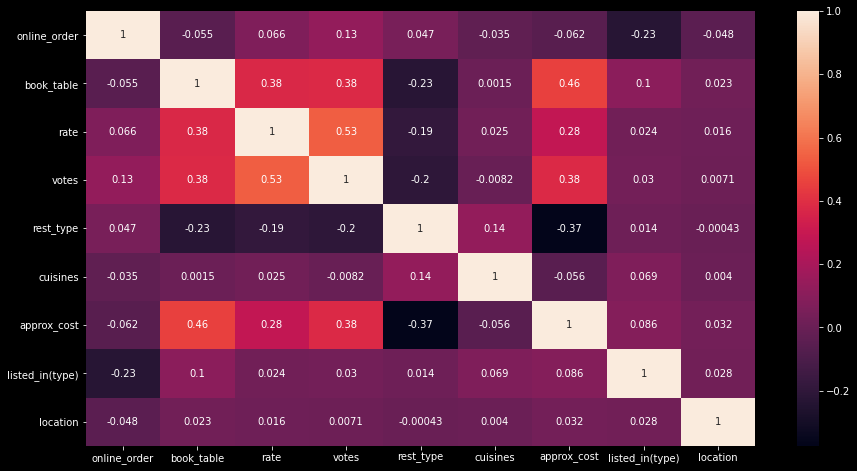

In [48]:
corr = data_pred.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data_pred.columns

In [49]:
target = data_pred.rate
fatures = data_pred.drop("rate", axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(fatures, target, random_state=42)

## Linear Regression

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, lr_pred)))


Training score: 0.296
R2 score: 0.300


## Ridge Regression

In [52]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print("Training score: {:.3f}".format(ridge.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, ridge_pred)))

Training score: 0.296
R2 score: 0.300


## Lasso 

In [53]:
lasso = Lasso(alpha=0.001, max_iter=100)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print("Training score: {:.3f}".format(lasso.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, lasso_pred)))

Training score: 0.296
R2 score: 0.300


## KNeighborRegressor

In [54]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)

knr_pred = knr.predict(X_test)

print("Training score: {:.3f}".format(knr.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, knr_pred)))

Training score: 0.921
R2 score: 0.677


## DecisionTreeRegressor

In [55]:
tree = DecisionTreeRegressor(max_depth=21, random_state=42)
tree.fit(X_train, y_train)

tree_pred = tree.predict(X_test)

print("Training score: {:.3f}".format(tree.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, tree_pred)))

Training score: 0.967
R2 score: 0.739


## Random Forests

In [56]:
rf = RandomForestRegressor(n_estimators=500, min_samples_leaf=0.00001, random_state=0)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, rf_pred)))

Training score: 0.976
R2 score: 0.832


## Gradient boosted forest

In [57]:
gb = GradientBoostingRegressor(random_state=42, learning_rate=0.7, max_depth=6, n_estimators=1200)
gb.fit(X_train, y_train)

gb_pred = gb.predict(X_test)

print("Training score: {:.3f}".format(gb.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, gb_pred)))

Training score: 0.991
R2 score: 0.779


## ExtraTreeRegressor

In [58]:
etree = ExtraTreesRegressor(n_estimators=100, random_state=42)
etree.fit(X_train,y_train)

etree_pred = etree.predict(X_test)

print("Training score: {:.3f}".format(etree.score(X_train, y_train)))
print("R2 score: {:.3f}".format(r2_score(y_test, etree_pred)))

Training score: 0.997
R2 score: 0.845


In [64]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, solver="lbfgs", hidden_layer_sizes=[100,100], max_iter=100000)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

KeyboardInterrupt: 